In [50]:
import pandas as pd
import os
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
cum_df = pd.concat([
    pd.read_csv(os.path.join("data/", file)).assign(filename=file) 
    for file in os.listdir("data/") if 'cum' in file
])

weekly_df = pd.concat([
    pd.read_csv(os.path.join("data/", file)).assign(filename=file) 
    for file in os.listdir("data/") if 'cum' not in file
])

In [52]:
area_df = pd.read_csv('data/carbon-stock_13-07-23.csv')

In [53]:
area_df['2021 carbon stock (million t)'] = area_df['2021 carbon stock (million t)'].replace(0, 1)

In [54]:
zone_mapping = {
 'AFR':'Africa',
 'EUR':'Europe',
 'OCE':'Oceania',
 'ASI':'Asia',
 'AME':'America',
}

In [55]:
country = {'AFR': ['Overview', 'DZA - Algeria', 'AGO - Angola', 'BEN - Benin', 'BWA - Botswana', 'IOT - British Indian Ocean Territory', 'BFA - Burkina Faso', 'BDI - Burundi', 'CMR - Cameroon', 'CPV - Cape Verde', 'CAF - Central African Republic', 'TCD - Chad', 'COM - Comoros', "CIV - Côte d'Ivoire", 'COD - Democratic Republic of the Congo', 'DJI - Djibouti', 'EGY - Egypt', 'GNQ - Equatorial Guinea', 'ERI - Eritrea', 'ETH - Ethiopia', 'ATF - French Southern Territories', 'GAB - Gabon', 'GMB - Gambia', 'GHA - Ghana', 'GIN - Guinea', 'GNB - Guinea-Bissau', 'KEN - Kenya', 'LSO - Lesotho', 'LBR - Liberia', 'LBY - Libya', 'MDG - Madagascar', 'MWI - Malawi', 'MLI - Mali', 'MRT - Mauritania', 'MUS - Mauritius', 'MYT - Mayotte', 'MAR - Morocco', 'MOZ - Mozambique', 'NAM - Namibia', 'NER - Niger', 'NGA - Nigeria', 'COG - Republic of Congo', 'REU - Reunion', 'RWA - Rwanda', 'SHN - Saint Helena', 'SEN - Senegal', 'SYC - Seychelles', 'SLE - Sierra Leone', 'SOM - Somalia', 'ZAF - South Africa', 'SSD - South Sudan', 'SDN - Sudan', 'SWZ - Swaziland', 'STP - São Tomé and Príncipe', 'TZA - Tanzania', 'TGO - Togo', 'TUN - Tunisia', 'UGA - Uganda', 'ESH - Western Sahara', 'ZMB - Zambia', 'ZWE - Zimbabwe'],
           'AME': ['Overview', 'AIA - Anguilla', 'ATG - Antigua and Barbuda', 'ARG - Argentina', 'ABW - Aruba', 'BHS - Bahamas', 'BRB - Barbados', 'BLZ - Belize', 'BMU - Bermuda', 'BOL - Bolivia', 'BES - Bonaire, Sint Eustatius and Saba', 'BVT - Bouvet Island', 'BRA - Brazil', 'VGB - British Virgin Islands', 'CAN - Canada', 'CYM - Cayman Islands', 'CHL - Chile', 'COL - Colombia', 'CRI - Costa Rica', 'CUB - Cuba', 'CUW - Curaçao', 'DMA - Dominica', 'DOM - Dominican Republic', 'ECU - Ecuador', 'SLV - El Salvador', 'FLK - Falkland Islands', 'GUF - French Guiana', 'GRL - Greenland', 'GRD - Grenada', 'GLP - Guadeloupe', 'GTM - Guatemala', 'GUY - Guyana', 'HTI - Haiti', 'HND - Honduras', 'JAM - Jamaica', 'MTQ - Martinique', 'MEX - Mexico', 'MSR - Montserrat', 'NIC - Nicaragua', 'PAN - Panama', 'PRY - Paraguay', 'PER - Peru', 'PRI - Puerto Rico', 'KNA - Saint Kitts and Nevis', 'LCA - Saint Lucia', 'SPM - Saint Pierre and Miquelon', 'VCT - Saint Vincent and the Grenadines', 'BLM - Saint-Barthélemy', 'MAF - Saint-Martin', 'SXM - Sint Maarten', 'SGS - South Georgia and the South Sandwich Islands', 'SUR - Suriname', 'TTO - Trinidad and Tobago', 'TCA - Turks and Caicos Islands', 'USA - United States', 'URY - Uruguay', 'VEN - Venezuela', 'VIR - Virgin Islands, U.S.'],
           'ASI': ['Overview', 'AFG - Afghanistan', 'XAD - Akrotiri and Dhekelia', 'ARM - Armenia', 'AZE - Azerbaijan', 'BHR - Bahrain', 'BGD - Bangladesh', 'BTN - Bhutan', 'BRN - Brunei', 'KHM - Cambodia', 'XCA - Caspian Sea', 'CHN - China', 'GEO - Georgia', 'HKG - Hong Kong', 'IND - India', 'IDN - Indonesia', 'IRN - Iran', 'IRQ - Iraq', 'ISR - Israel', 'JPN - Japan', 'JOR - Jordan', 'KAZ - Kazakhstan', 'KWT - Kuwait', 'KGZ - Kyrgyzstan', 'LAO - Laos', 'LBN - Lebanon', 'MAC - Macao', 'MYS - Malaysia', 'MDV - Maldives', 'MNG - Mongolia', 'MMR - Myanmar', 'NPL - Nepal', 'PRK - North Korea', 'OMN - Oman', 'PAK - Pakistan', 'PSE - Palestina', 'PHL - Philippines', 'QAT - Qatar', 'SAU - Saudi Arabia', 'SGP - Singapore', 'KOR - South Korea', 'LKA - Sri Lanka', 'SYR - Syria', 'TWN - Taiwan', 'TJK - Tajikistan', 'THA - Thailand', 'TLS - Timor-Leste', 'TUR - Turkey', 'TKM - Turkmenistan', 'ARE - United Arab Emirates', 'UZB - Uzbekistan', 'VNM - Vietnam', 'YEM - Yemen'],
           'EUR': ['Overview', 'ALB - Albania', 'AND - Andorra', 'AUT - Austria', 'BLR - Belarus', 'BEL - Belgium', 'BIH - Bosnia and Herzegovina', 'BGR - Bulgaria', 'HRV - Croatia', 'CYP - Cyprus', 'CZE - Czech Republic', 'DNK - Denmark', 'EST - Estonia', 'FRO - Faroe Islands', 'FIN - Finland', 'FRA - France', 'DEU - Germany', 'GIB - Gibraltar', 'GRC - Greece', 'GGY - Guernsey', 'HUN - Hungary', 'ISL - Iceland', 'IRL - Ireland', 'IMN - Isle of Man', 'ITA - Italy', 'JEY - Jersey', 'XKO - Kosovo under UNSCR 1244', 'LVA - Latvia', 'LIE - Liechtenstein', 'LTU - Lithuania', 'LUX - Luxembourg', 'MLT - Malta', 'MDA - Moldova', 'MCO - Monaco', 'MNE - Montenegro', 'NLD - Netherlands', 'MKD - North Macedonia', 'NOR - Norway', 'POL - Poland', 'PRT - Portugal', 'ROU - Romania', 'RUS - Russia', 'SMR - San Marino', 'SRB - Serbia', 'SVK - Slovakia', 'SVN - Slovenia', 'ESP - Spain', 'SJM - Svalbard and Jan Mayen', 'SWE - Sweden', 'CHE - Switzerland', 'UKR - Ukraine', 'GBR - United Kingdom', 'VAT - Vatican City', 'ALA - Åland'],
           'OCE': ['Overview', 'ASM - American Samoa', 'AUS - Australia', 'CXR - Christmas Island', 'CCK - Cocos Islands', 'COK - Cook Islands', 'FJI - Fiji', 'PYF - French Polynesia', 'GUM - Guam', 'HMD - Heard Island and McDonald Islands', 'KIR - Kiribati', 'MHL - Marshall Islands', 'FSM - Micronesia', 'NRU - Nauru', 'NCL - New Caledonia', 'NZL - New Zealand', 'NIU - Niue', 'NFK - Norfolk Island', 'MNP - Northern Mariana Islands', 'PLW - Palau', 'PNG - Papua New Guinea', 'PCN - Pitcairn Islands', 'WSM - Samoa', 'SLB - Solomon Islands', 'TKL - Tokelau', 'TON - Tonga', 'TUV - Tuvalu', 'UMI - United States Minor Outlying Islands', 'VUT - Vanuatu', 'WLF - Wallis and Futuna']
          }

In [56]:
metric_type = {
    'seasonal-trend_dsrcum': 'GWIS Weekly Cumulative Severity Rating',
    'seasonal-trend_tacum-viirs' : 'VIIRS Weekly Cumulative Thermal Anomalies',
    'seasonal-trend_tacum-modis' : 'MODIS Weekly Cumulative Thermal Anomalies',
    'seasonal-trend_nfcum': 'GWIS Weekly Cumulative Number of Fires',
    'emissions_weekly-cum': 'GWIS Weekly Cumulative Emissions - [CO2] - Carbon Dioxide',
    'seasonal-trend_bacum': 'GWIS Weekly Cumulative Burnt Areas',
    'seasonal-trend_dsr': 'GWIS Weekly Severity Rating',
    'seasonal-trend_ta-viirs' : 'VIIRS Weekly Thermal Anomalies',
    'seasonal-trend_ta-modis' : 'MODIS Weekly Thermal Anomalies',
    'seasonal-trend_nf': 'GWIS Weekly Number of Fires',
    'emissions_weekly': 'GWIS Weekly Emissions - [CO2] - Carbon Dioxide',
    'seasonal-trend_ba': 'GWIS Weekly Burnt Areas',
}

In [57]:
rows = []

for zone, countries in country.items():
    for item in countries:
        if item == 'Overview':
            abbrv = zone
            full = zone
        else:
            abbrv, full = item.split(' - ', 1)
        rows.append({'zone': zone, 'abbrv': abbrv, 'full': full})

country_df = pd.DataFrame(rows)

In [58]:
def extract_capitals(filename):
    match = re.search(r'[A-Z]{3}', filename)
    if match:
        return match.group(0)
    return None

cum_df['country'] = cum_df['filename'].apply(extract_capitals)
cum_df.loc[cum_df['country'].isna(), 'country'] = 'overview'

weekly_df['country'] = weekly_df['filename'].apply(extract_capitals)
weekly_df.loc[weekly_df['country'].isna(), 'country'] = 'overview'

In [59]:
def assign_metric_type(filename):
    for key, value in metric_type.items():
        if key in filename:
            return value
    return None

cum_df['metric_type'] = cum_df['filename'].apply(assign_metric_type)
weekly_df['metric_type'] = weekly_df['filename'].apply(assign_metric_type)

In [60]:
cum_df = cum_df.merge(country_df, how='left', left_on='country', right_on='abbrv')
weekly_df = weekly_df.merge(country_df, how='left', left_on='country', right_on='abbrv')

In [61]:
cum_df['Min'] = cum_df.filter(like='Min').sum(axis=1)
cum_df['Max'] = cum_df.filter(like='Max').sum(axis=1)
cum_df['Average'] = cum_df.filter(like='Average').sum(axis=1)


weekly_df['Min'] = weekly_df.filter(like='Min').sum(axis=1)
weekly_df['Max'] = weekly_df.filter(like='Max').sum(axis=1)
weekly_df['Average'] = weekly_df.filter(like='Average').sum(axis=1)

In [62]:
cum_df = cum_df[['Day', 'metric_type', 'zone', 'full','Min', 'Max', 'Average']]
weekly_df = weekly_df[['Day', 'metric_type', 'zone', 'full','Min', 'Max', 'Average']]

In [63]:
cum_df['zone'] = cum_df['zone'].map(zone_mapping)
weekly_df['zone'] = weekly_df['zone'].map(zone_mapping)

In [64]:
cum_df = cum_df.rename(columns={'full': 'country'})
weekly_df = weekly_df.rename(columns={'full': 'country'})

In [65]:
cum_df['country'] = cum_df['country'].map(zone_mapping).fillna(cum_df['country'])
weekly_df['country'] = weekly_df['country'].map(zone_mapping).fillna(weekly_df['country'])

In [66]:
weekly_df['Date'] = pd.to_datetime(weekly_df['Day'] + ' 2024', format='%d %b %Y')
weekly_df['Month'] = weekly_df['Date'].dt.month
weekly_df['Quarter'] = weekly_df['Date'].dt.to_period('Q')
weekly_df = weekly_df[weekly_df['country']!=weekly_df['zone']]

In [67]:
monthly_df = weekly_df.groupby(['metric_type', 'country', 'Month', 'zone'])[['Average', 'Min', 'Max']].mean().reset_index()

In [68]:
quarter_df = weekly_df.groupby(['metric_type', 'country', 'Quarter', 'zone'])[['Average', 'Min', 'Max']].mean().reset_index()

In [69]:
weekly_df = weekly_df.drop(['Date', 'Month', 'Quarter'], axis=1)

In [70]:
overview_df = cum_df[cum_df['country']==cum_df['zone']]

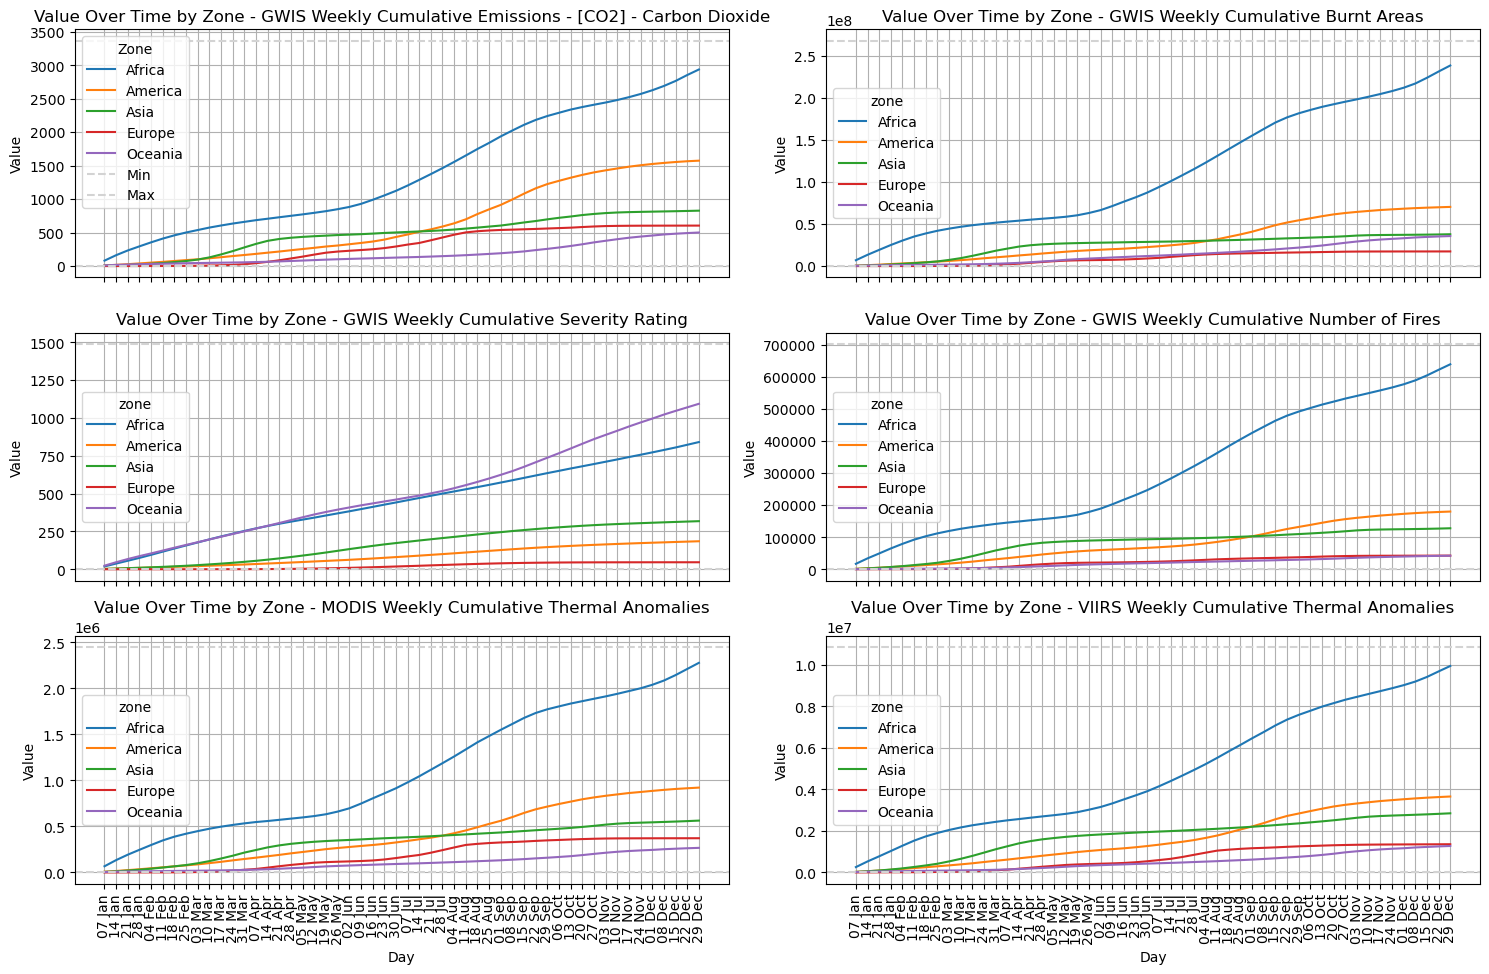

In [22]:
metric_types = overview_df['metric_type'].unique()
n_metrics = len(metric_types)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10), sharex=True, sharey=False)

axes = axes.flatten()

for i, metric in enumerate(metric_types):
    ax = axes[i]
    subset_df = overview_df[overview_df['metric_type'] == metric]
    
    sns.lineplot(data=subset_df, x='Day', y='Average', hue='zone', ax=ax)
    
    min_value = subset_df['Min'].min()
    max_value = subset_df['Max'].max()
    
    ax.axhline(y=min_value, color='lightgray', linestyle='--', label='Min')
    ax.axhline(y=max_value, color='lightgray', linestyle='--', label='Max')
    
    ax.set_title(f'Value Over Time by Zone - {metric}')
    ax.set_xlabel('Day')
    ax.set_ylabel('Value')
    ax.grid(True)
    ax.tick_params(axis='x', labelrotation=90)
    
    if i == 0: 
        ax.legend(title='Zone')

for j in range(len(metric_types), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [71]:
df = cum_df[cum_df['country']!=cum_df['zone']]

In [73]:
df = df.merge(area_df, how='left', left_on='country', right_on='Country')

df['Norm Min'] = df['Min']/df['2021 carbon stock (million t)']
df['Norm Max'] = df['Max']/df['2021 carbon stock (million t)']
df['Norm Average'] = df['Average']/df['2021 carbon stock (million t)']

In [75]:
weekly_df = weekly_df.merge(area_df, how='left', left_on='country', right_on='Country')

weekly_df['Norm Min'] = weekly_df['Min']/weekly_df['2021 carbon stock (million t)']
weekly_df['Norm Max'] = weekly_df['Max']/weekly_df['2021 carbon stock (million t)']
weekly_df['Norm Average'] = weekly_df['Average']/weekly_df['2021 carbon stock (million t)']

In [76]:
monthly_df = monthly_df.merge(area_df, how='left', left_on='country', right_on='Country')

monthly_df['Norm Min'] = monthly_df['Min']/monthly_df['2021 carbon stock (million t)']
monthly_df['Norm Max'] = monthly_df['Max']/monthly_df['2021 carbon stock (million t)']
monthly_df['Norm Average'] = monthly_df['Average']/monthly_df['2021 carbon stock (million t)']

In [77]:
quarter_df = quarter_df.merge(area_df, how='left', left_on='country', right_on='Country')

quarter_df['Norm Min'] = quarter_df['Min']/quarter_df['2021 carbon stock (million t)']
quarter_df['Norm Max'] = quarter_df['Max']/quarter_df['2021 carbon stock (million t)']
quarter_df['Norm Average'] = quarter_df['Average']/quarter_df['2021 carbon stock (million t)']

In [27]:
weekly_df.to_csv('output/weekly_data.csv', index=False)
monthly_df.to_csv('output/monthly_data.csv', index=False)
quarter_df.to_csv('output/quarter_data.csv', index=False)

In [78]:
weekly_df = weekly_df.dropna(subset=['Norm Average'])
monthly_df = monthly_df.dropna(subset=['Norm Average'])
quarter_df = quarter_df.dropna(subset=['Norm Average'])

In [79]:
def score_within_group(series):
    min_val = series.min()
    max_val = series.max()
    quantiles = series.quantile(q=np.linspace(0, 1, 6)).values
    quantiles = np.unique(quantiles)
    if len(quantiles) < 6:
        quantiles = np.linspace(min_val, max_val, 6)
    labels = range(1, len(quantiles))
    scores = pd.cut(series, bins=quantiles, labels=labels, include_lowest=True)
    return scores

df.loc[:, 'Average Score'] = df.groupby(['metric_type', 'Day'])['Norm Average'].transform(score_within_group)
df.loc[:, 'Min Score'] = df.groupby(['metric_type', 'Day'])['Norm Min'].transform(score_within_group)
df.loc[:, 'Max Score'] = df.groupby(['metric_type', 'Day'])['Norm Max'].transform(score_within_group)

In [35]:
quarter_df['Quarter'] = quarter_df['Quarter'].astype('string').str.replace('2024', '')

In [82]:
def score_within_group(series):
    min_val = series.min()
    max_val = series.max()
    quantiles = series.quantile(q=np.linspace(0, 1, 6)).values
    quantiles = np.unique(quantiles)
    if len(quantiles) < 6:
        quantiles = np.linspace(min_val, max_val, 6)
    labels = range(1, len(quantiles))
    scores = pd.cut(series, bins=quantiles, labels=labels, include_lowest=True)
    return scores

weekly_df.loc[:, 'Average Score'] = weekly_df.groupby(['metric_type', 'Day'])['Norm Average'].transform(score_within_group)
monthly_df.loc[:, 'Average Score'] = monthly_df.groupby(['metric_type', 'Month'])['Norm Average'].transform(score_within_group)
quarter_df.loc[:, 'Average Score'] = quarter_df.groupby(['metric_type', 'Quarter'])['Norm Average'].transform(score_within_group)

In [83]:
total_cum_df = df[df['Day'] == '29 Dec']

In [84]:
total_cum_df = total_cum_df.dropna(subset=['Norm Average'])

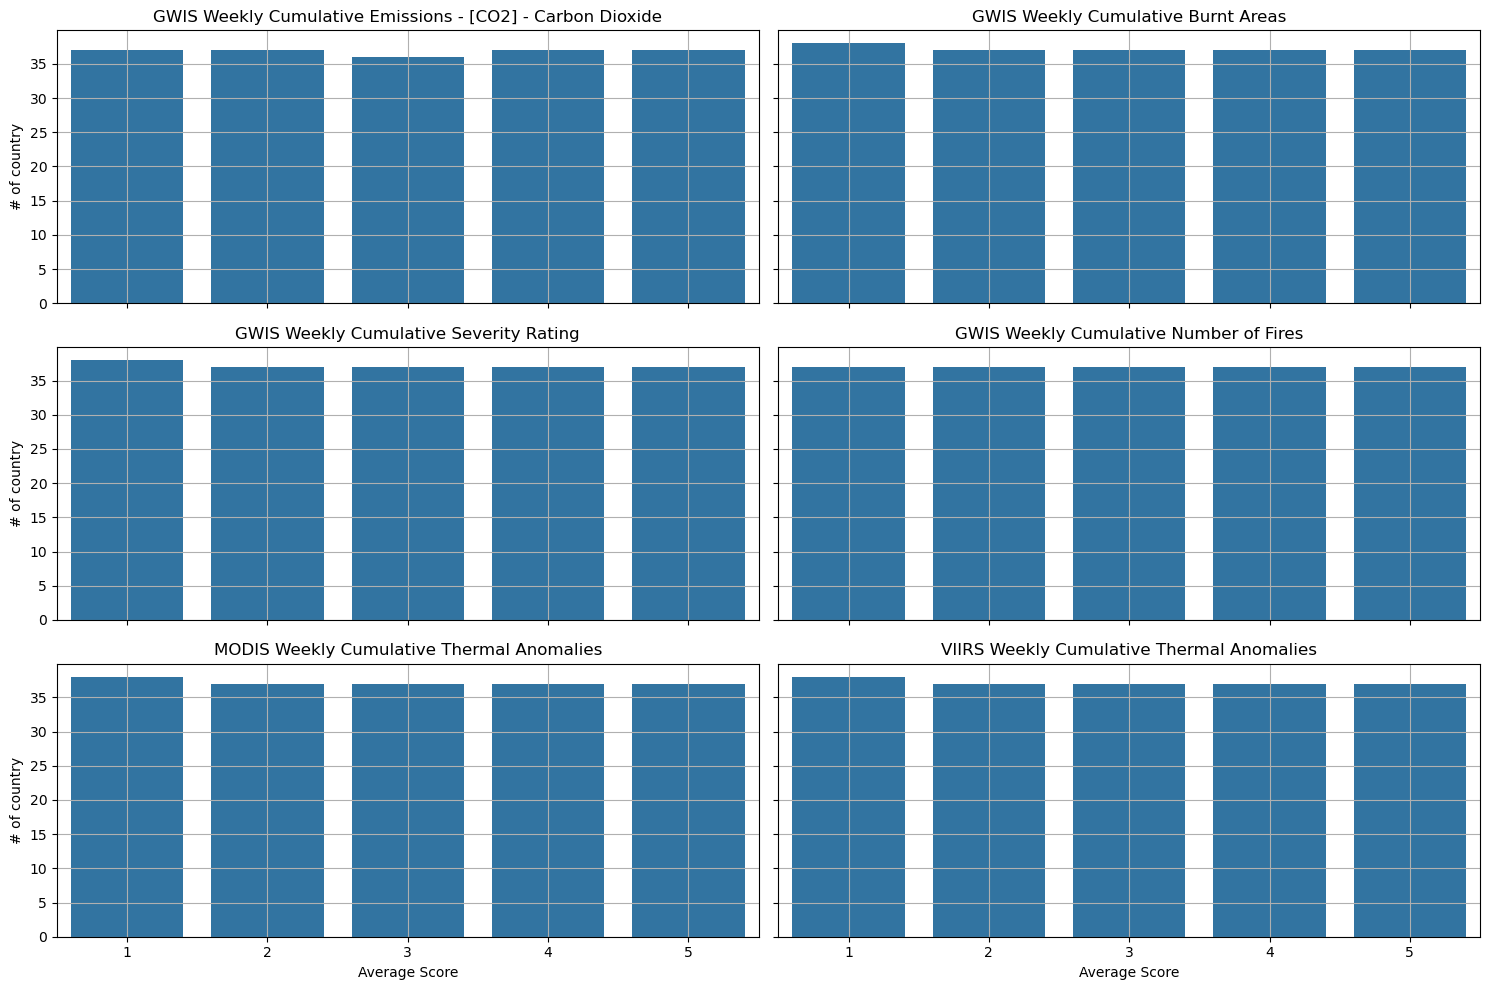

In [41]:
metric_types = total_cum_df['metric_type'].unique()
n_metrics = len(metric_types)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10), sharex=True, sharey=True)
axes = axes.flatten()
for i, metric in enumerate(metric_types):
    ax = axes[i]
    subset_df = total_cum_df[total_cum_df['metric_type'] == metric]
    
    counts = subset_df.groupby('Average Score', observed=False)['country'].nunique()
    sns.barplot(x=counts.index, y=counts.values, ax=ax)
    
    ax.set_title(f'{metric}')
    ax.set_xlabel('Average Score')
    ax.set_ylabel('# of country')
    ax.grid(True)

for j in range(len(metric_types), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [85]:
total_cum_df['Average Score'] = total_cum_df['Average Score'].astype('int')

In [86]:
pivot_df = total_cum_df.pivot_table(
    index='country',
    columns='metric_type',
    values='Average Score',
    fill_value=0
)
pivot_df.columns = [f'{col}' for col in pivot_df.columns]
pivot_df = pivot_df.reset_index()

In [87]:
pivot_df['Average Scoring'] = pivot_df[['GWIS Weekly Cumulative Burnt Areas',
       'GWIS Weekly Cumulative Emissions - [CO2] - Carbon Dioxide',
       'GWIS Weekly Cumulative Number of Fires',
       'GWIS Weekly Cumulative Severity Rating',
       'MODIS Weekly Cumulative Thermal Anomalies',
       'VIIRS Weekly Cumulative Thermal Anomalies']].mean(axis=1).round(1)

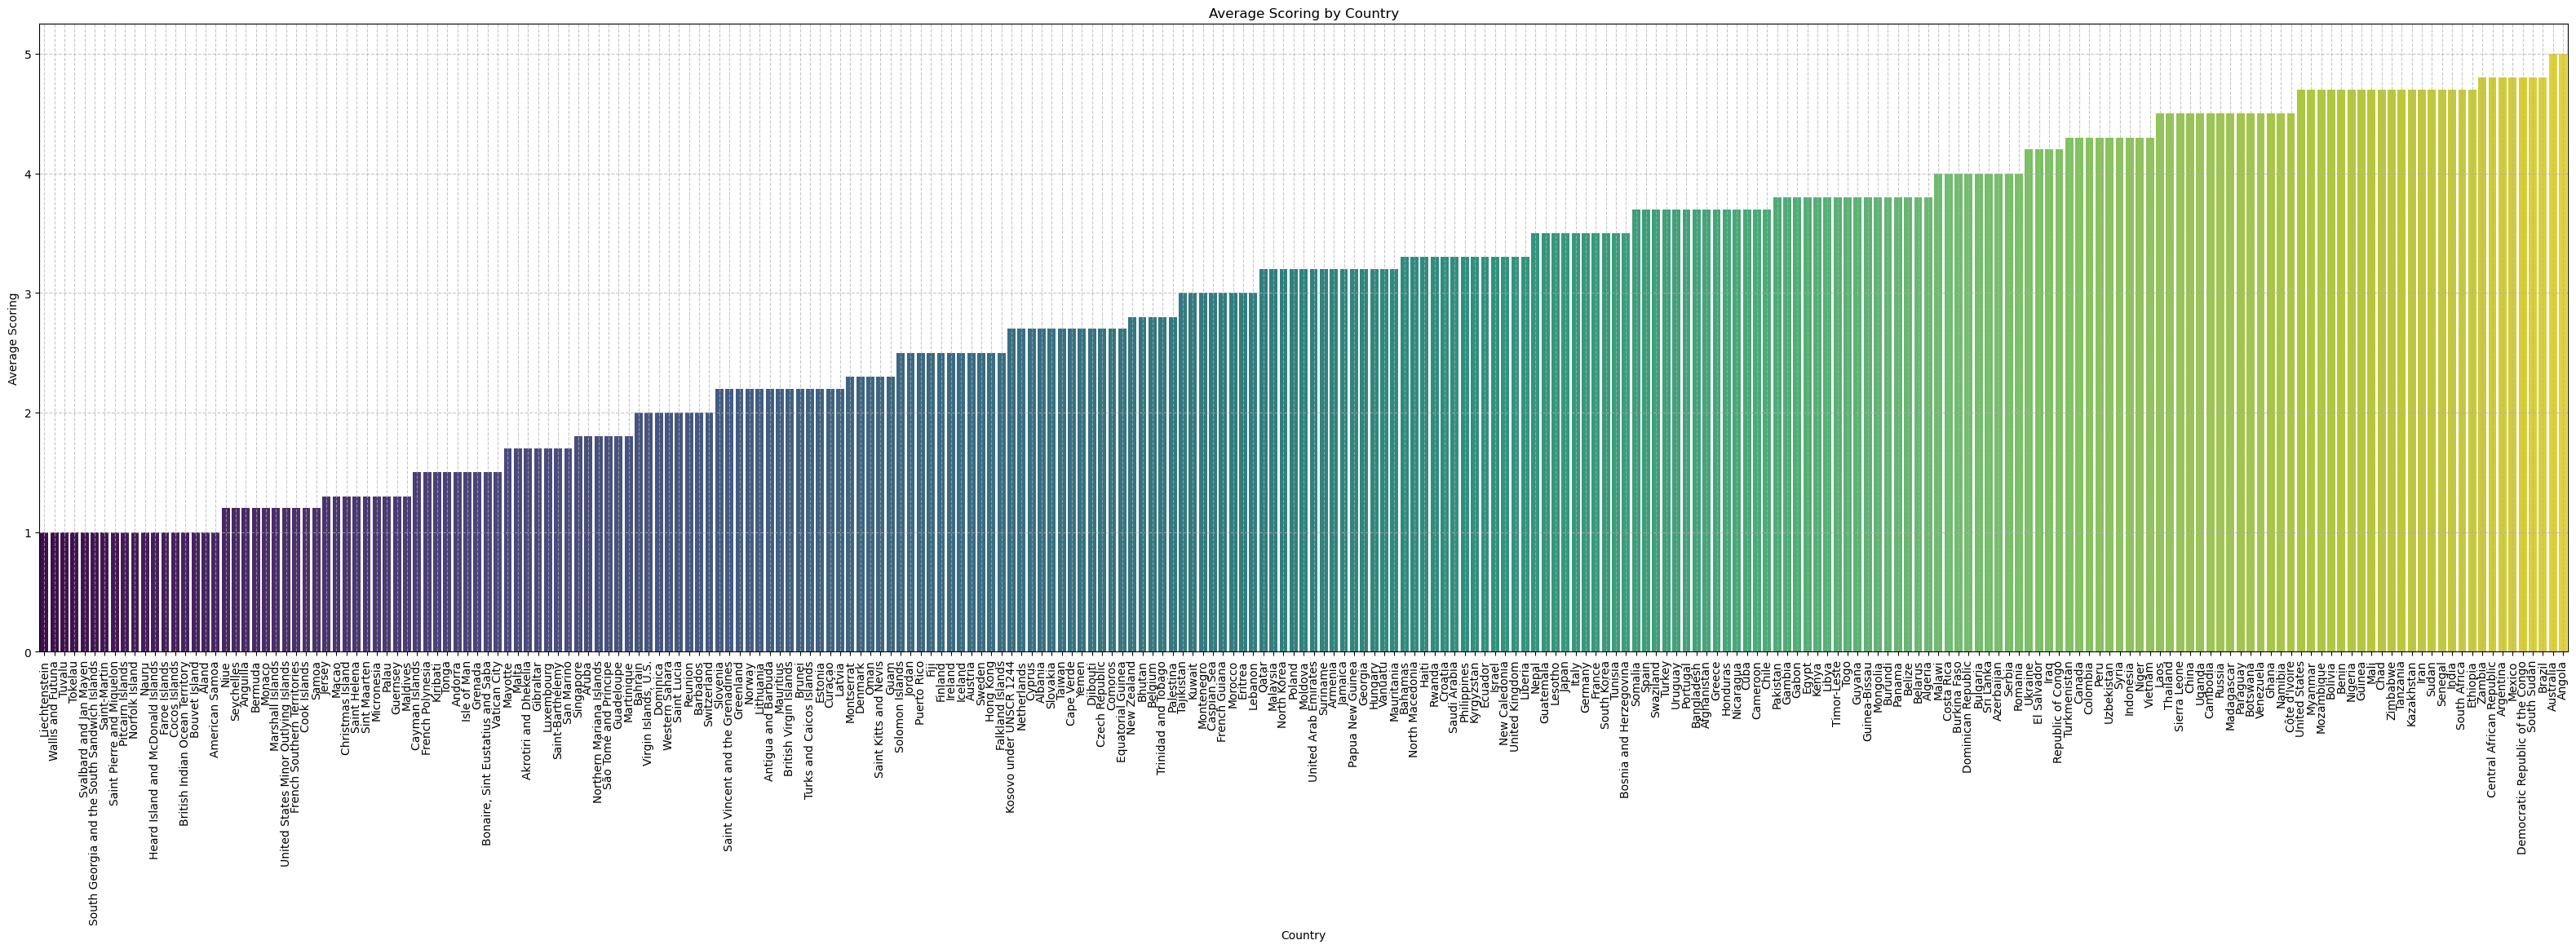

In [69]:
pivot_df_sorted = pivot_df.sort_values(by='Average Scoring')

plt.figure(figsize=(40, 10))
sns.barplot(x='country', y='Average Scoring', data=pivot_df_sorted, palette='viridis', hue='country')
plt.title('Average Scoring by Country')
plt.xlabel('Country')
plt.ylabel('Average Scoring')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='x', labelrotation=90)
plt.show()

In [45]:
pivot_df.sort_values(by='Average Scoring', ascending=False).head(20)

country  GWIS Weekly Cumulative Burnt Areas  \
57         Gambia                                 5.0   
78         Israel                                 5.0   
171  Turkmenistan                                 5.0   
89        Lesotho                                 5.0   
37        Curaçao                                 5.0   
45          Egypt                                 5.0   
162         Syria                                 5.0   
121         Niger                                 5.0   
72        Iceland                                 5.0   
138         Qatar                                 4.0   
76           Iraq                                 5.0   
0         Algeria                                 5.0   
15          Benin                                 5.0   
145       Senegal                                 5.0   
99           Mali                                 5.0   
166          Togo                                 5.0   
96         Malawi                                 5.0   
29           Chad                                 5.0   
91          Libya                                 3.0   
83     Kazakhstan                                 5.0   

     GWIS Weekly Cumulative Emissions - [CO2] - Carbon Dioxide  \
57                                                 5.0           
78                                                 5.0           
171                                                5.0           
89                                                 5.0           
37                                                 5.0           
45                                                 5.0           
162                                                5.0           
121                                                5.0           
72                                                 4.0           
138                                                5.0           
76                                                 3.0           
0                                                  3.0           
15                                                 3.0           
145                                                3.0           
99                                                 3.0           
166                                                3.0           
96                                                 3.0           
29                                                 3.0           
91                                                 5.0           
83                                                 3.0           

     GWIS Weekly Cumulative Number of Fires  \
57                                      5.0   
78                                      5.0   
171                                     5.0   
89                                      5.0   
37                                      5.0   
45                                      5.0   
162                                     5.0   
121                                     5.0   
72                                      5.0   
138                                     4.0   
76                                      5.0   
0                                       5.0   
15                                      5.0   
145                                     5.0   
99                                      5.0   
166                                     5.0   
96                                      5.0   
29                                      5.0   
91                                      4.0   
83                                      5.0   

     GWIS Weekly Cumulative Severity Rating  \
57                                      5.0   
78                                      5.0   
171                                     5.0   
89                                      5.0   
37                                      5.0   
45                                      5.0   
162                                     5.0   
121                                     5.0   
72            

In [566]:
weekly_df['Average Score'] = weekly_df['Average Score'].astype('int')
grouped = weekly_df.groupby(['country', 'Day'])['Average Score'].mean().round(1).reset_index()
grouped.rename(columns={'Average Score': 'Total Average Score'}, inplace=True)
weekly_df = weekly_df.merge(grouped, on=['country', 'Day'])

In [567]:
monthly_df['Average Score'] = monthly_df['Average Score'].astype('int')
grouped = monthly_df.groupby(['country', 'Month'])['Average Score'].mean().round(1).reset_index()
grouped.rename(columns={'Average Score': 'Total Average Score'}, inplace=True)
monthly_df = monthly_df.merge(grouped, on=['country', 'Month'])

In [568]:
quarter_df['Average Score'] = quarter_df['Average Score'].astype('int')
grouped = quarter_df.groupby(['country', 'Quarter'])['Average Score'].mean().round(1).reset_index()
grouped.rename(columns={'Average Score': 'Total Average Score'}, inplace=True)
quarter_df = quarter_df.merge(grouped, on=['country', 'Quarter'])

In [578]:
weekly_df.to_csv('output/weekly_scoring_by_country.csv', index=False)
monthly_df.to_csv('output/monthly_scoring_by_country.csv', index=False)
quarter_df.to_csv('output/quarterly_scoring_by_country.csv', index=False)

In [88]:
selected_country = [
                    'Albania'
                    ,'Brazil'
                    ,'Finland'
                    ,'Hungary'
                    ,'Iceland'
                    ,'India'
                    ,'Israel'
                    ,'Italy'
                    ,'Mexico'
                    ,'Russia'
                    ,'Saudi Arabia'
                    ,'Spain'
                    ,'Turkey'
                    ,'Uganda'
                    ,'Ukraine'
                    ,'United Kingdom'
                    ,'United States'
                    ]

In [580]:
selected_monthly_df = monthly_df[monthly_df['country'].isin(selected_country)]
selected_weekly_df = weekly_df[weekly_df['country'].isin(selected_country)]
selected_quarter_df = quarter_df[quarter_df['country'].isin(selected_country)]

In [89]:
selected_cum_df = pivot_df[pivot_df['country'].isin(selected_country)]
selected_cum_df.to_csv('output/ICR_cumulative_scoring_by_country.csv', index=False)

In [582]:
selected_monthly_df.to_csv('output/ICR_monthly_scoring_by_country.csv', index=False)
selected_weekly_df.to_csv('output/ICR_weekly_scoring_by_country.csv', index=False)
selected_quarter_df.to_csv('output/ICR_quarterly_scoring_by_country.csv', index=False)

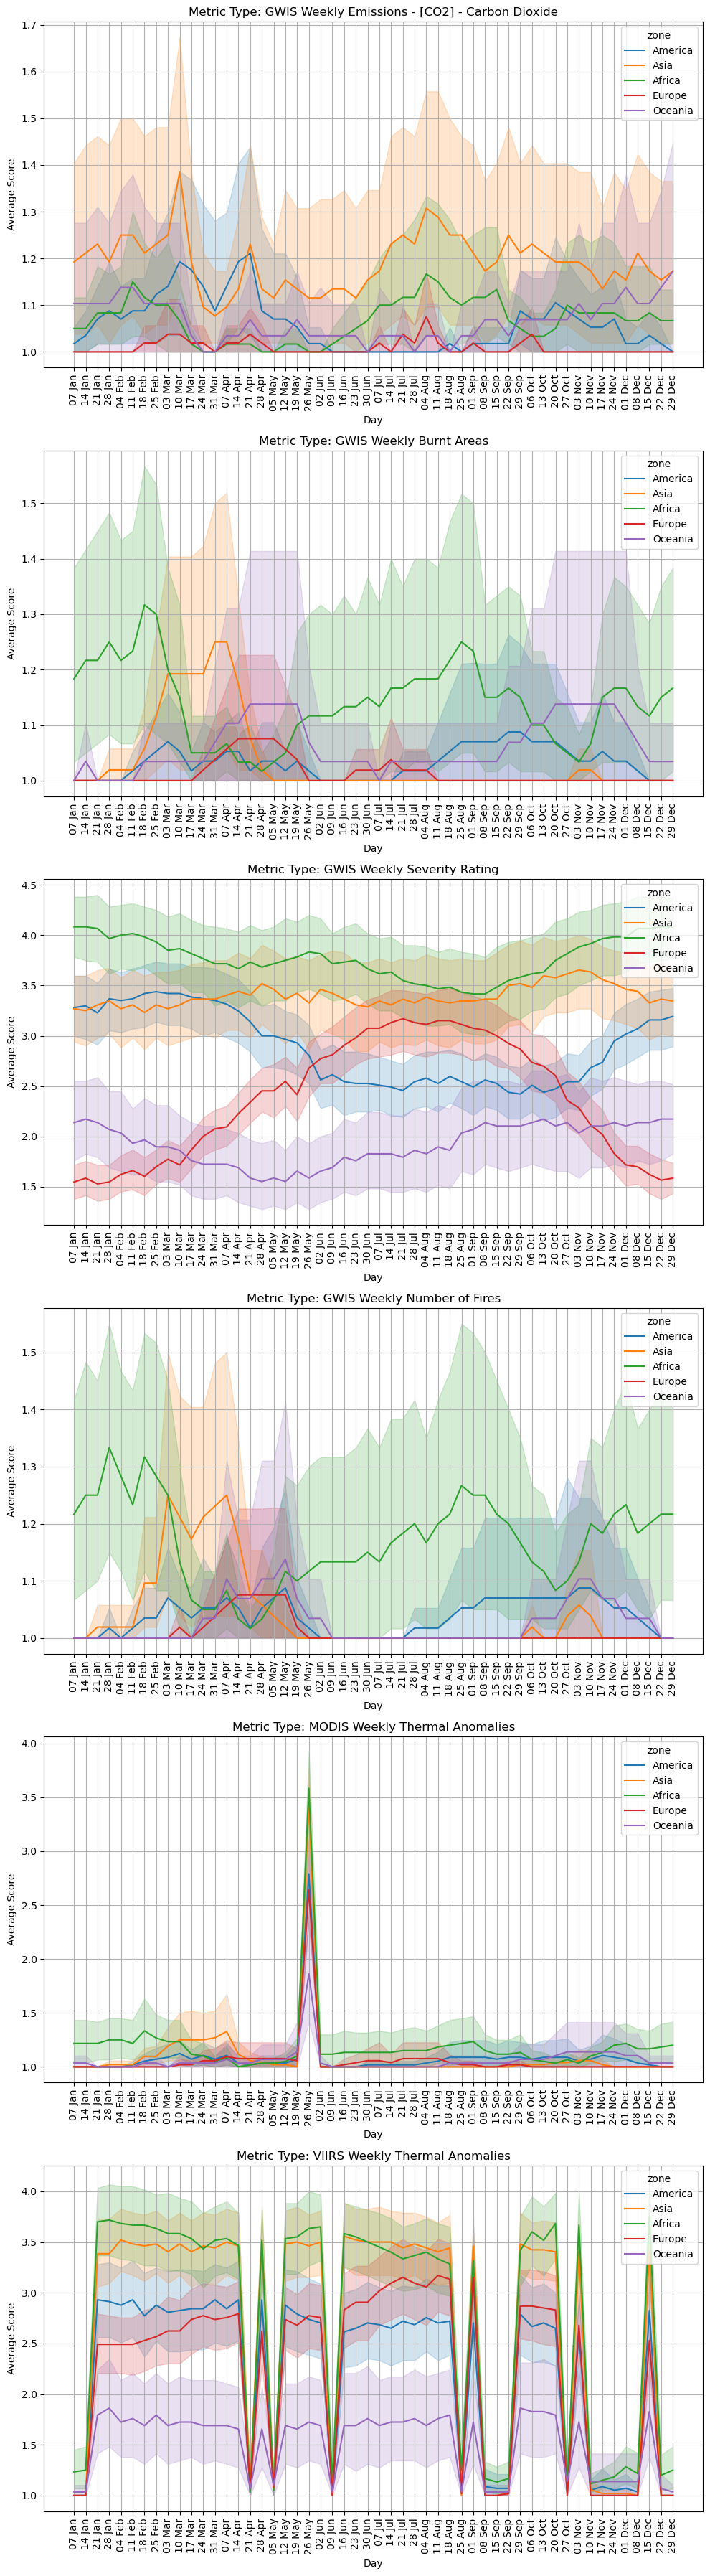

In [271]:
metric_types = weekly_df['metric_type'].unique()

fig, axes = plt.subplots(nrows=len(metric_types), ncols=1, figsize=(10, 6 * len(metric_types)))

if len(metric_types) == 1:
    axes = [axes]

for ax, metric in zip(axes, metric_types):
    subset = weekly_df[weekly_df['metric_type'] == metric]
    sns.lineplot(data=subset, x='Day', y='Average Score', hue='zone', ax=ax)
    ax.set_title(f'Metric Type: {metric}')
    ax.set_xlabel('Day')
    ax.set_ylabel('Average Score')
    ax.grid(True)
    ax.tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.show()

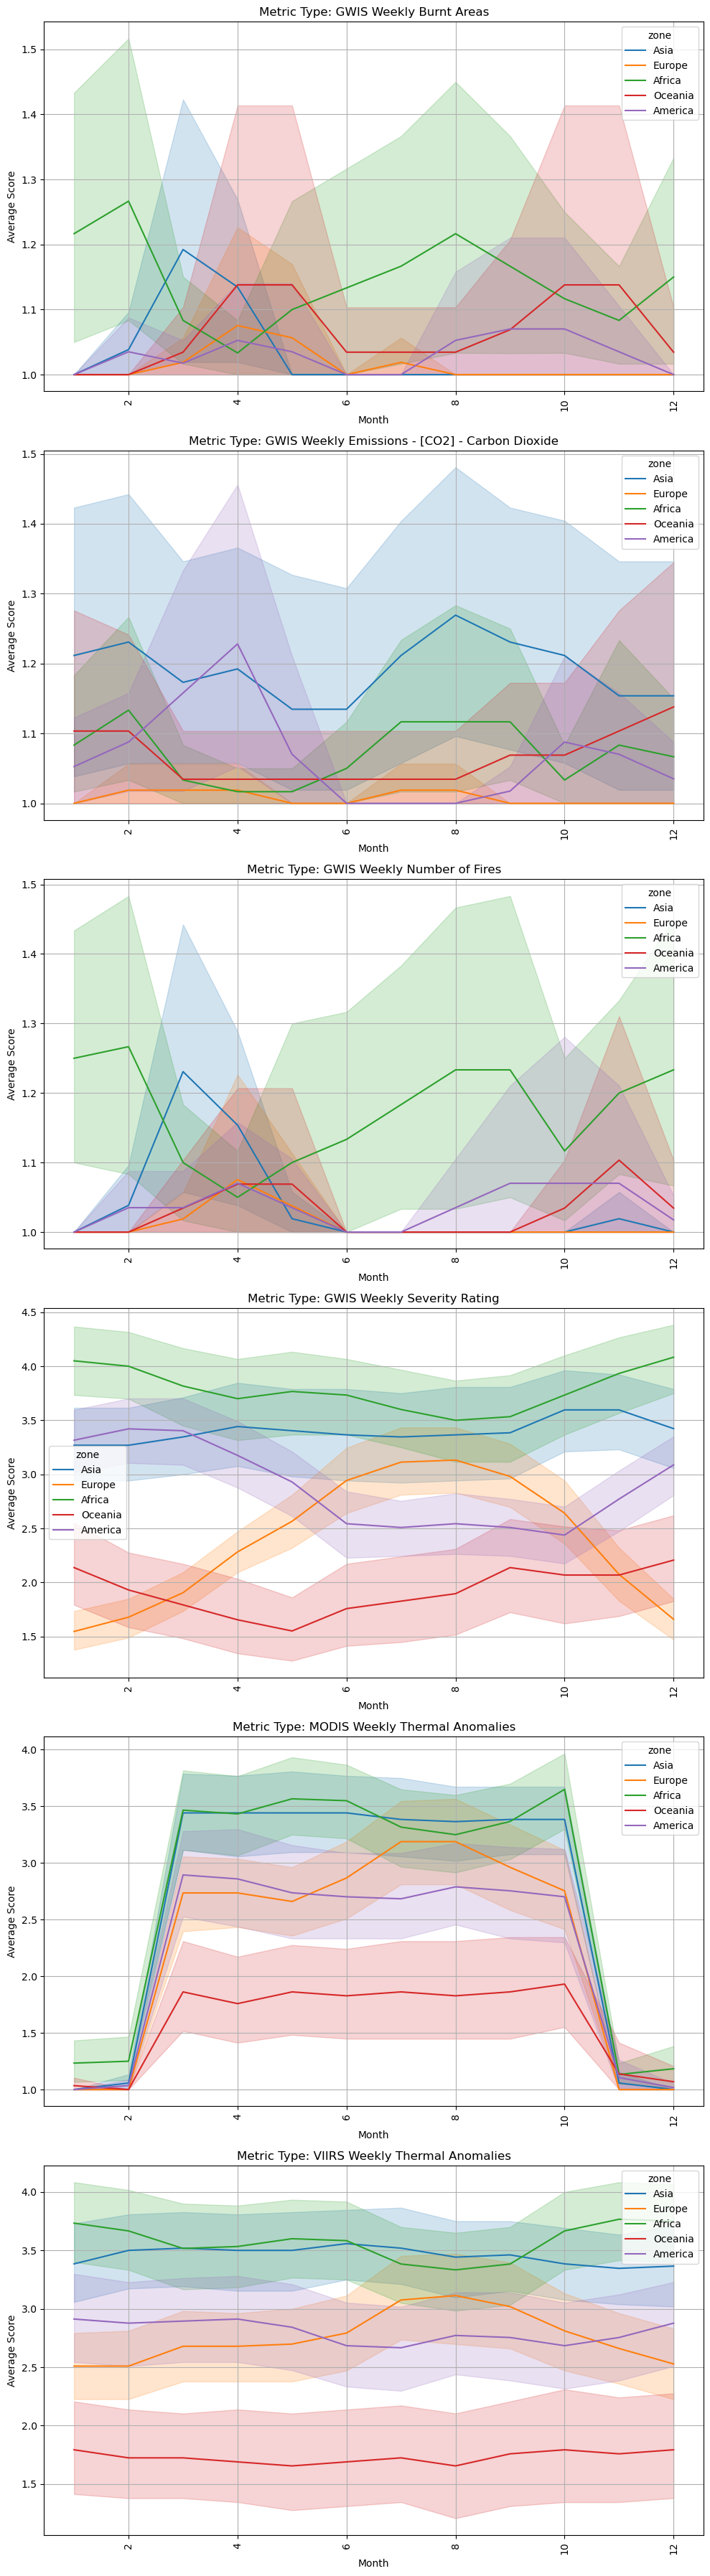

In [306]:
metric_types = monthly_df['metric_type'].unique()

fig, axes = plt.subplots(nrows=len(metric_types), ncols=1, figsize=(10, 6 * len(metric_types)))

if len(metric_types) == 1:
    axes = [axes]

for ax, metric in zip(axes, metric_types):
    subset = monthly_df[monthly_df['metric_type'] == metric]
    sns.lineplot(data=subset, x='Month', y='Average Score', hue='zone', ax=ax)
    ax.set_title(f'Metric Type: {metric}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Average Score')
    ax.grid(True)
    ax.tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.show()

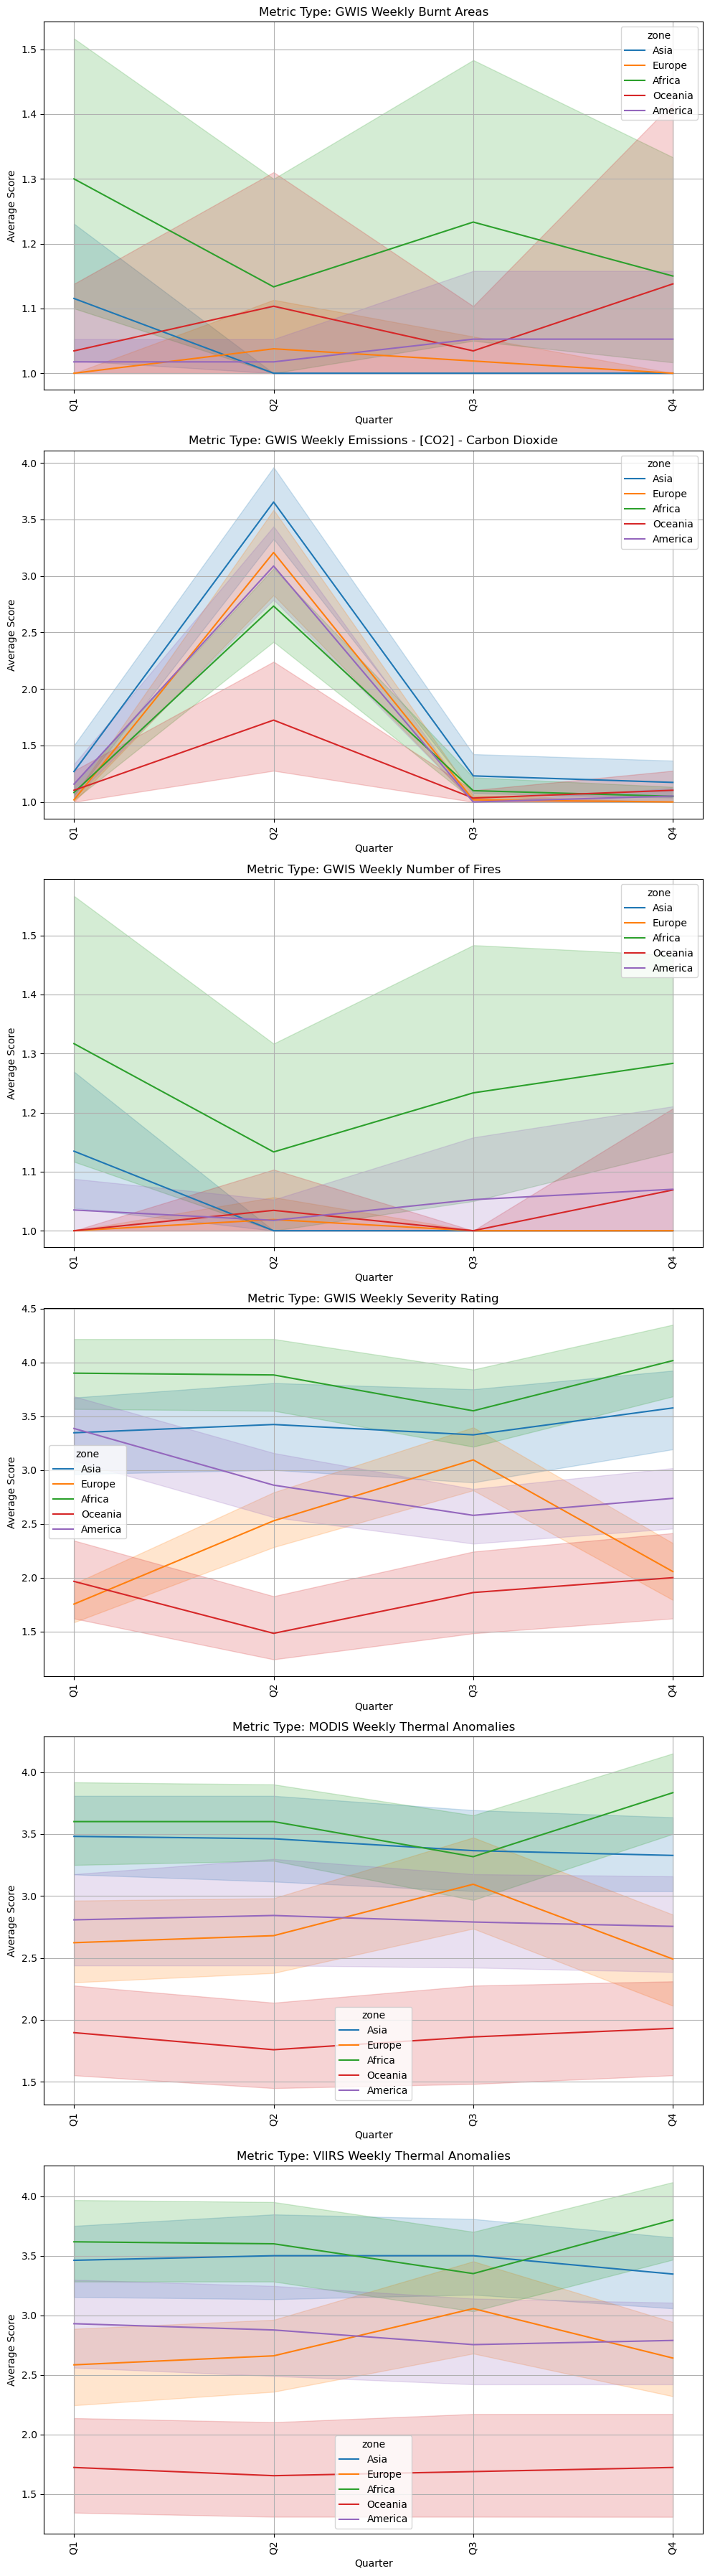

In [308]:
metric_types = quarter_df['metric_type'].unique()

fig, axes = plt.subplots(nrows=len(metric_types), ncols=1, figsize=(10, 6 * len(metric_types)))

if len(metric_types) == 1:
    axes = [axes]

for ax, metric in zip(axes, metric_types):
    subset = quarter_df[quarter_df['metric_type'] == metric]
    sns.lineplot(data=subset, x='Quarter', y='Average Score', hue='zone', ax=ax)
    ax.set_title(f'Metric Type: {metric}')
    ax.set_xlabel('Quarter')
    ax.set_ylabel('Average Score')
    ax.grid(True)
    ax.tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.show()

### 1. Plot using weekly datapoint scores, line is calculated by averaging the weekly datapoint scores to monthly granularity, band is the fluctuated values of different weeks on each month

#### Plot on different metrics

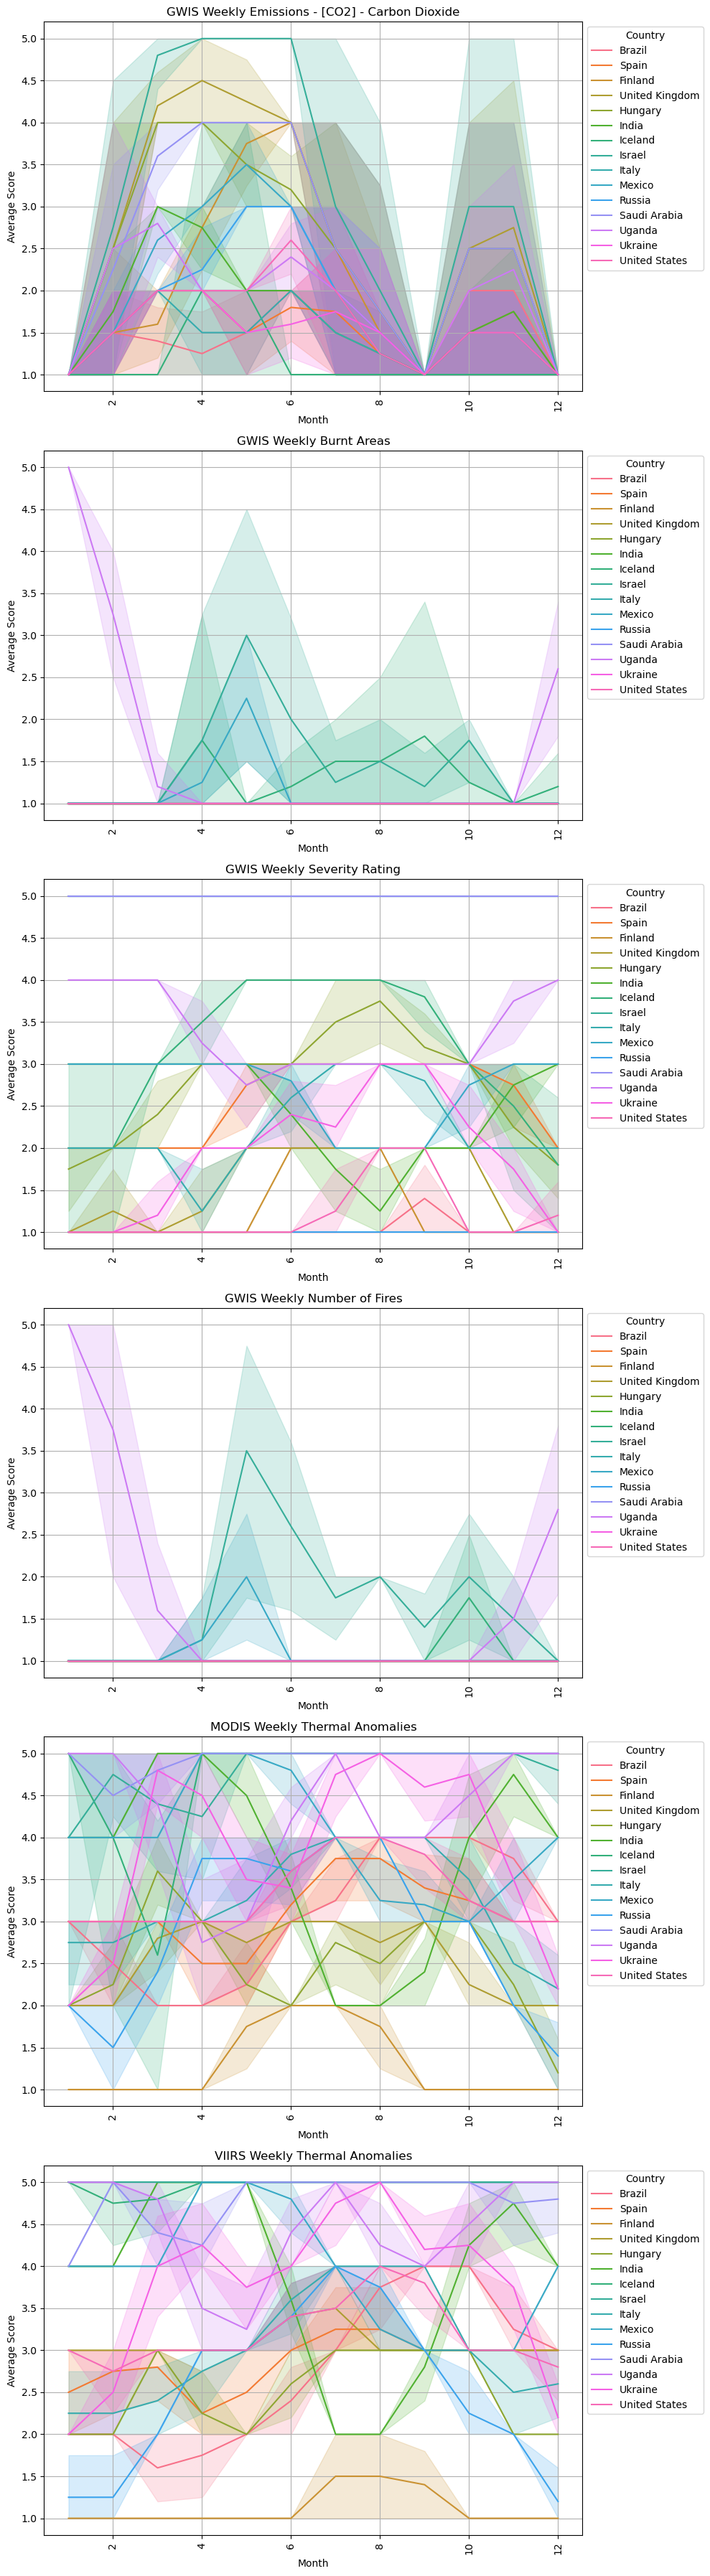

In [556]:
metric_types = selected_weekly_df['metric_type'].unique()

fig, axes = plt.subplots(nrows=len(metric_types), ncols=1, figsize=(10, 6 * len(metric_types)))

if len(metric_types) == 1:
    axes = [axes]

for ax, metric in zip(axes, metric_types):
    subset = selected_weekly_df[selected_weekly_df['metric_type'] == metric]
    sns.lineplot(data=subset, x='Month', y='Average Score', hue='country', ax=ax)
    ax.set_title(f'{metric}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Average Score')
    ax.grid(True)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Country')

plt.tight_layout()
plt.show()

#### Average on all metrics

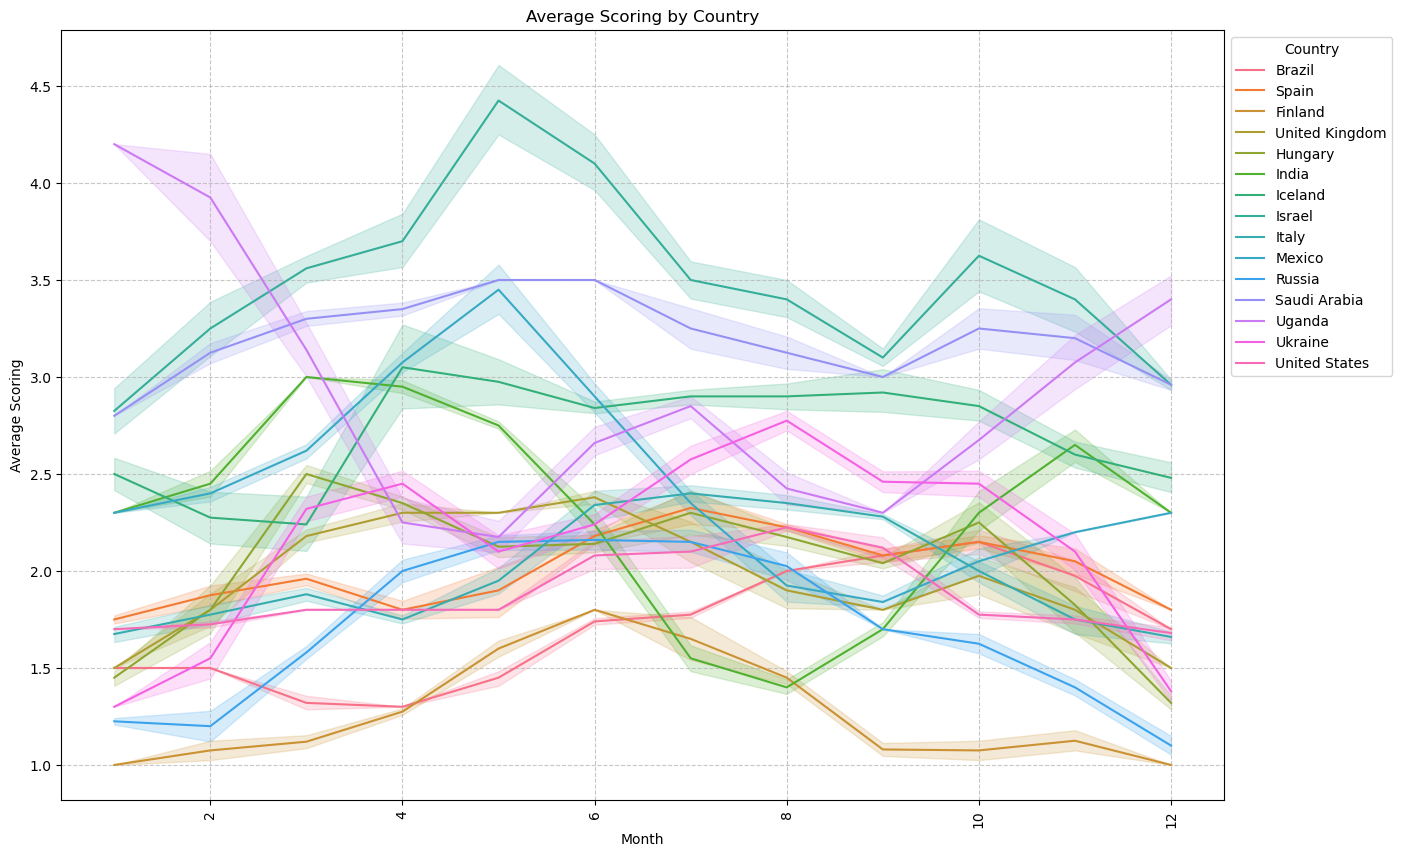

In [583]:
plt.figure(figsize=(15, 10))

sns.lineplot(data=selected_weekly_df, x='Month', y='Total Average Score', hue='country')

plt.title('Average Scoring by Country')
plt.xlabel('Month')
plt.ylabel('Average Scoring')

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Country')

plt.show()

### 2. Plot using monthly datapoint (by averaging from weekly datapoint, then perform scoring), line is monthly score and band is min-max

#### Plot on different metrics

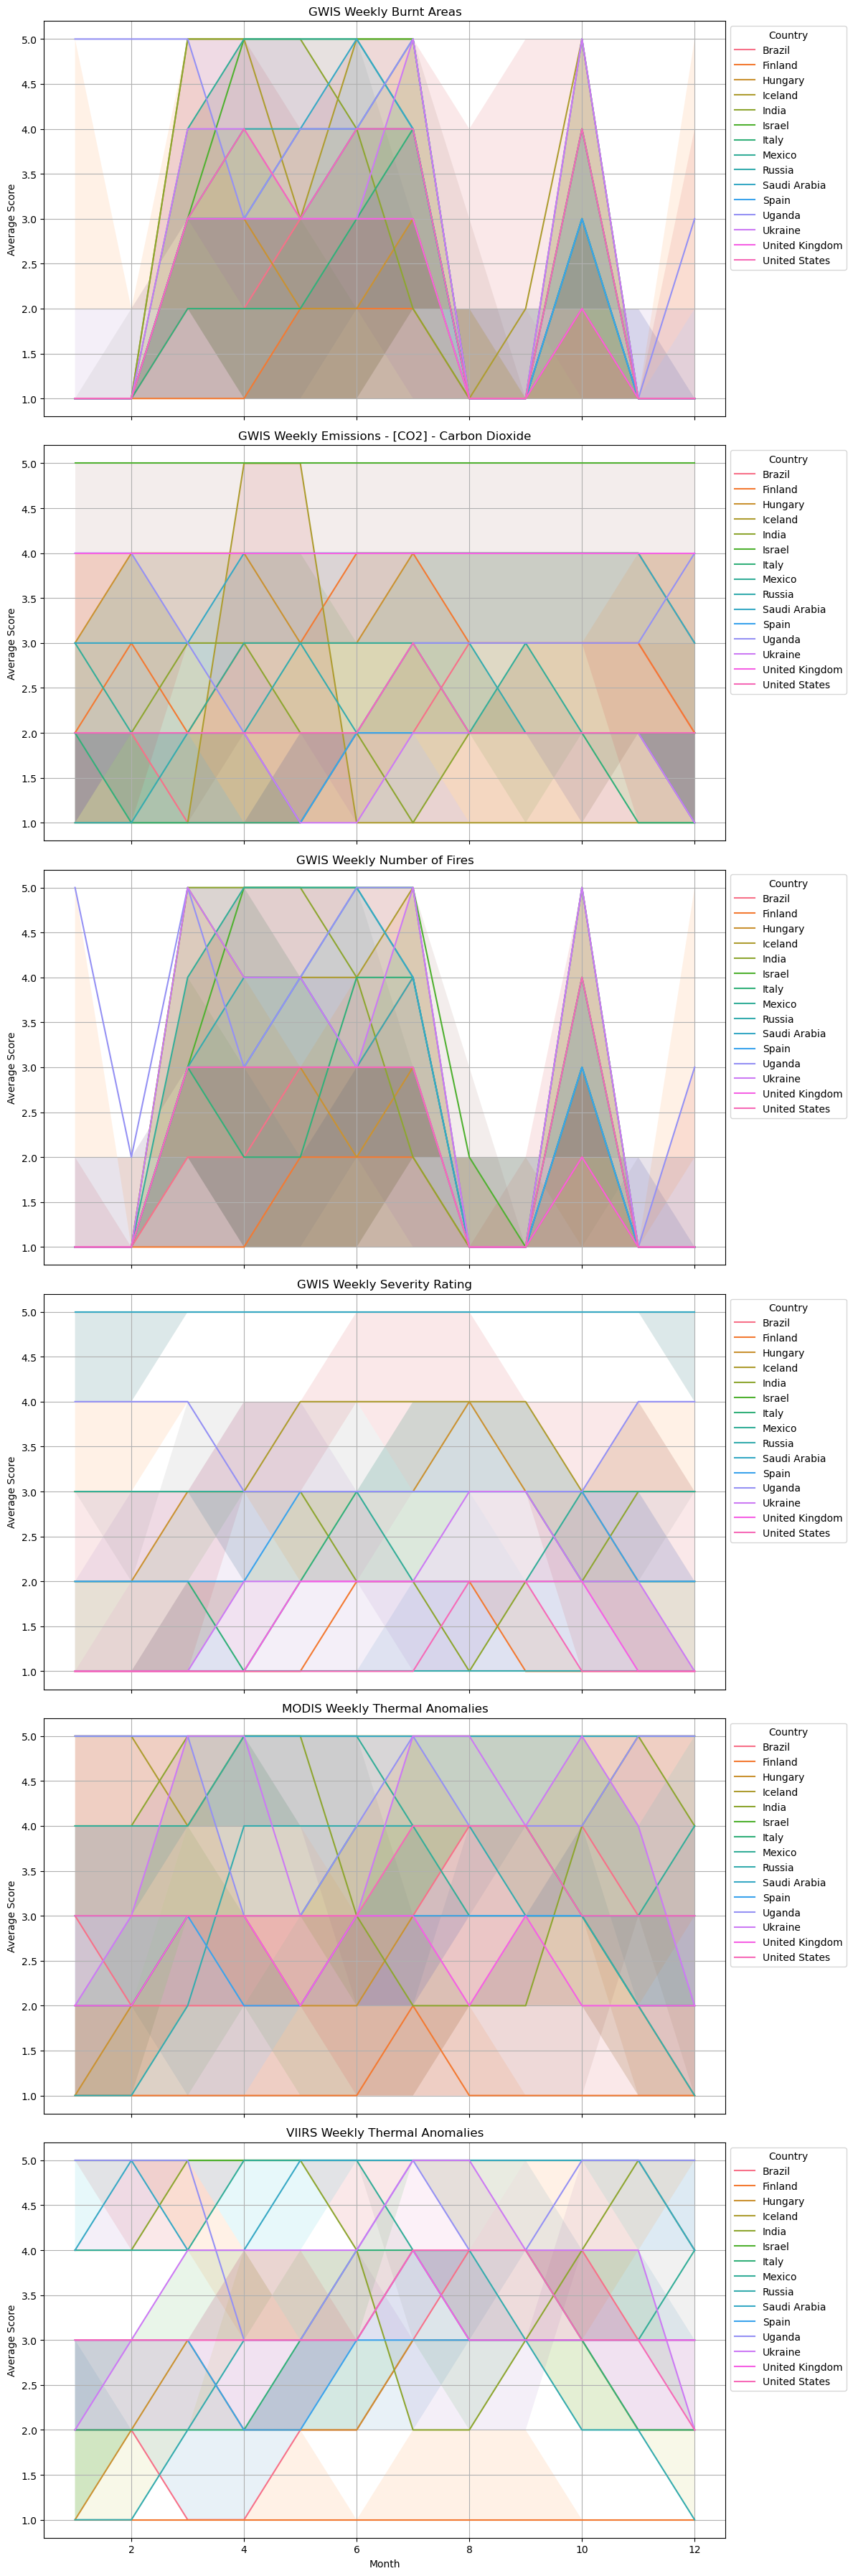

In [592]:
metric_types = selected_monthly_df['metric_type'].unique()

fig, axes = plt.subplots(nrows=len(metric_types), ncols=1, figsize=(12, 6 * len(metric_types)), sharex=True)

if len(metric_types) == 1:
    axes = [axes]

for ax, metric in zip(axes, metric_types):
    subset = selected_monthly_df[selected_monthly_df['metric_type'] == metric]
    
    for country in subset['country'].unique():
        country_subset = subset[subset['country'] == country]
        ax.fill_between(country_subset['Month'], country_subset['Min Score'], country_subset['Max Score'], alpha=0.1)
    
    sns.lineplot(data=subset, x='Month', y='Average Score', hue='country', ax=ax)

    ax.set_title(f'{metric}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Average Score')
    ax.grid(True)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Country')

plt.tight_layout()
plt.show()

#### Average on all metrics¶

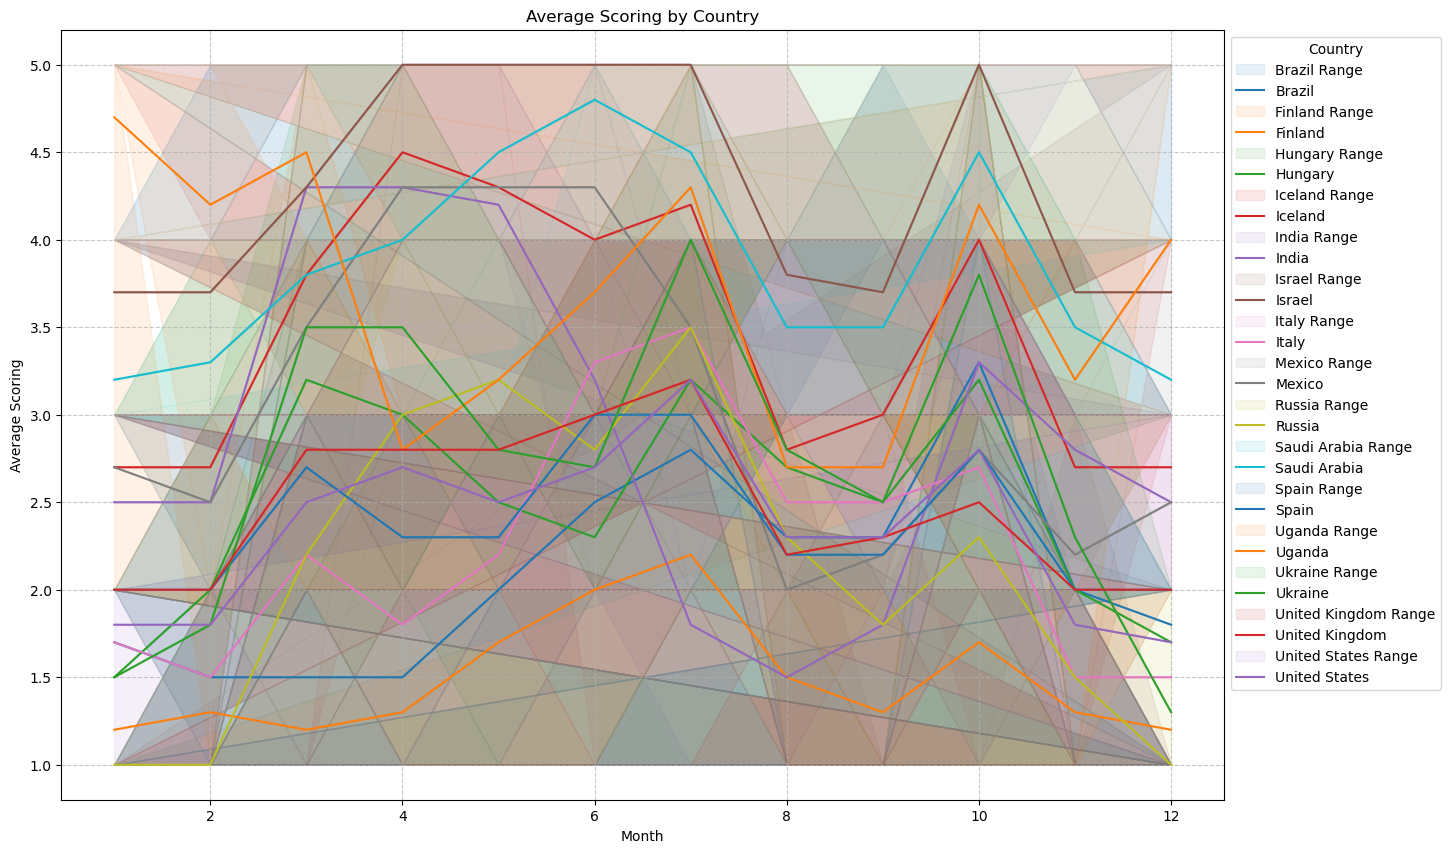

In [605]:
plt.figure(figsize=(15, 10))

palette = sns.color_palette('tab10', n_colors=len(selected_monthly_df['country'].unique()))

for i, country in enumerate(selected_monthly_df['country'].unique()):
    country_subset = selected_monthly_df[selected_monthly_df['country'] == country]
    
    plt.fill_between(country_subset['Month'], 
                     country_subset['Min Score'], 
                     country_subset['Max Score'], 
                     alpha=0.1, 
                     color=palette[i], 
                     label=f'{country} Range')
    
    sns.lineplot(data=country_subset, 
                 x='Month', 
                 y='Total Average Score', 
                 color=palette[i], 
                 label=country)

plt.title('Average Scoring by Country')
plt.xlabel('Month')
plt.ylabel('Average Scoring')

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Country')

plt.show()